In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, f1_score

In [3]:
train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")
test_survived = pd.read_csv("./Data/gender_submission.csv")

In [4]:
train_df["train/test"] = "Train"
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [5]:
# Adding "Survived" column to test dataset.
test_df = test_df.merge(test_survived)
test_df.insert(1,"survived",value=test_df["Survived"])
test_df.drop(columns="Survived",inplace=True)
test_df.rename(columns={"survived":"Survived"}, inplace=True)

#  I will add a new column which called train/test in order not to confuse the train and test datasets. I will split them later.
test_df["train/test"] = "Test"
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test


In [9]:
df = pd.concat([train_df, test_df])
print("Shape of df :",df.shape)
df.head()

Shape of df : (1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [10]:
df.set_index("PassengerId", inplace=True)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
# Rate of missing values by columns.
df.isna().sum() / df.shape[0] * 100

Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age           20.091673
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.076394
Cabin         77.463713
Embarked       0.152788
train/test     0.000000
dtype: float64

Text(0.5, 1.0, 'Count of Male and Female')

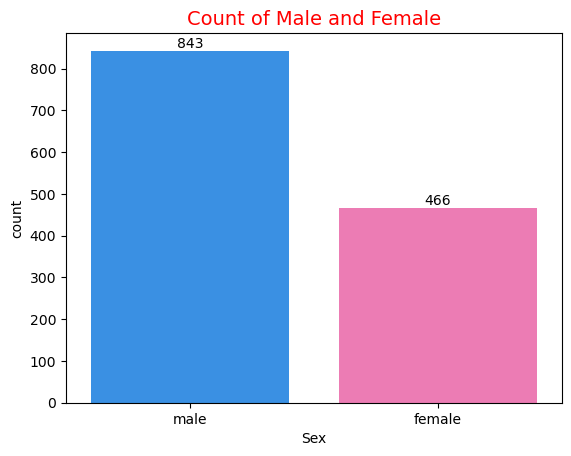

In [13]:
ax = sns.countplot(data=df, x="Sex", palette=sns.color_palette(["#1e90ff","#ff69b4"]))
ax.bar_label(ax.containers[0])
plt.title("Count of Male and Female", size=14, color="red")

Text(0.5, 1.0, 'Count of Survived')

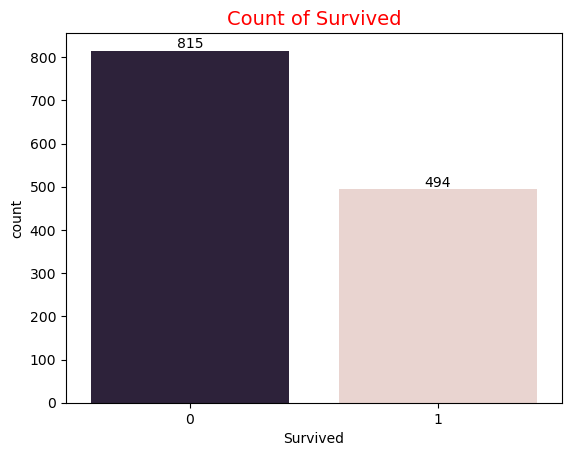

In [14]:
ax = sns.countplot(data=df, x="Survived", palette=sns.cubehelix_palette(2,reverse=True))
ax.bar_label(ax.containers[0])
plt.title("Count of Survived", size=14, color="red")

Text(0.5, 1.0, 'Count of Survived by Sex')

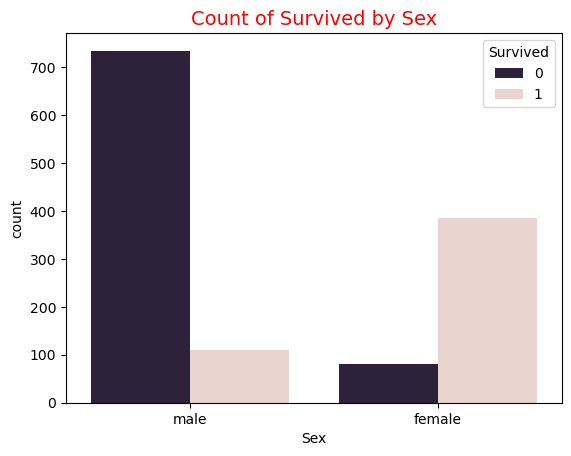

In [15]:
ax = sns.countplot(data=df, x="Sex", hue="Survived",palette=sns.cubehelix_palette(2,reverse=True))
plt.title("Count of Survived by Sex", size=14, color="red")

Text(0.5, 1.0, 'Count of Survived by Embarked')

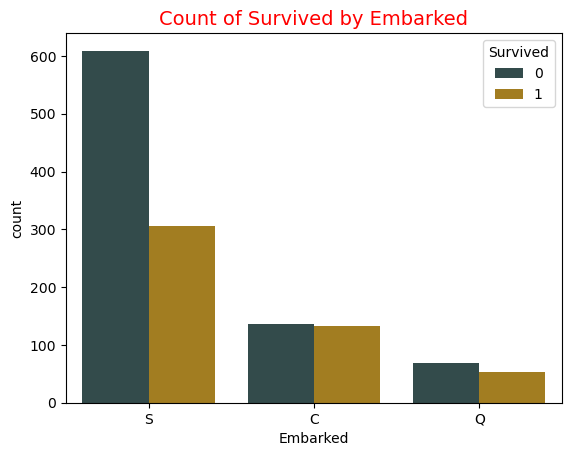

In [16]:
ax = sns.countplot(data=df, x="Embarked", hue="Survived",palette=sns.color_palette(["#2f4f4f","#b8860b"]))
plt.title("Count of Survived by Embarked", size=14, color="red")

Text(0.5, 1.0, 'Count of Survived by Class')

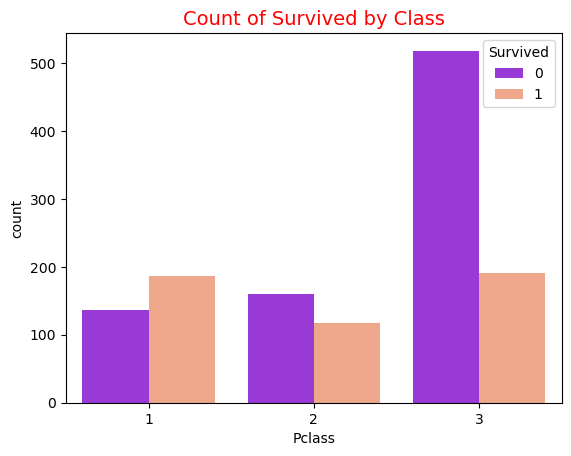

In [17]:
ax = sns.countplot(data=df, x="Pclass", hue="Survived",palette=sns.color_palette(["#a020f0","#ffa07a"]))
plt.title("Count of Survived by Class", size=14, color="red")

<AxesSubplot:xlabel='Age', ylabel='Count'>

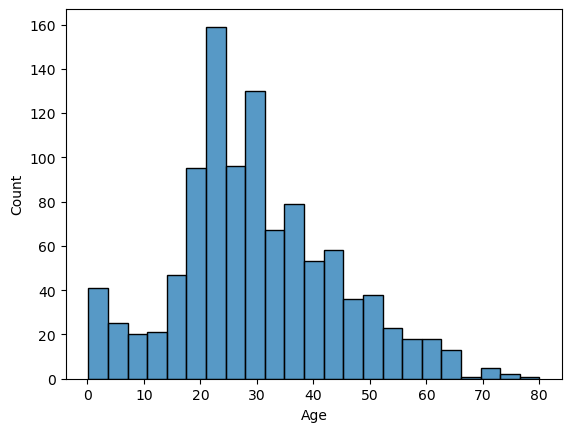

In [18]:
sns.histplot(x=df.Age)

In [20]:
scaler = StandardScaler()
df["Fare"] = scaler.fit_transform(df["Fare"].values.reshape(-1,1))

c:\Users\ZBook\anaconda3\envs\deep_learning\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='features', ylabel='values'>

c:\Users\ZBook\anaconda3\envs\deep_learning\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


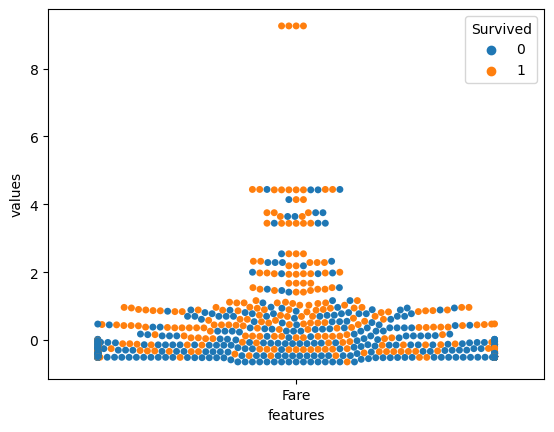

In [21]:
df_melt = pd.melt(df[["Survived","Fare"]],id_vars="Survived",var_name="features",value_name="values")
sns.swarmplot(data=df_melt, x="features",y="values",hue="Survived")

In [25]:
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Embarked"] = encoder.fit_transform(df["Embarked"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,-0.503402,NaN,2,Train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,0.734222,C85,0,Train
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,-0.490356,NaN,2,Train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.382778,C123,2,Train
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,-0.487940,NaN,2,Train


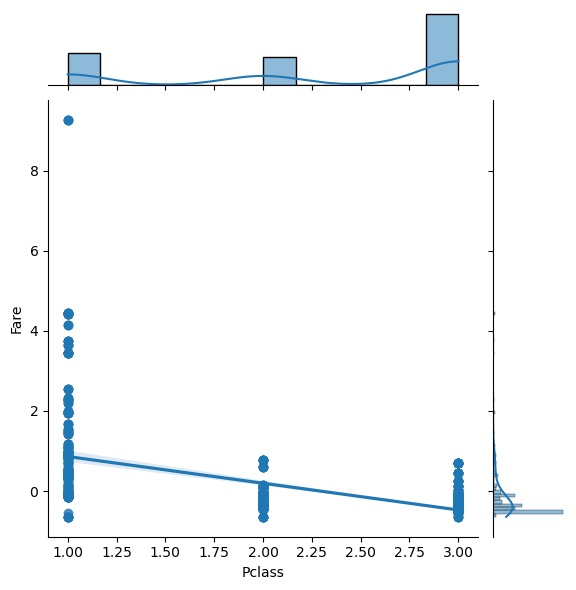

In [26]:
sns.jointplot(data=df, x="Pclass", y="Fare", kind="reg");

C:\Users\ZBook\AppData\Local\Temp\ipykernel_4844\3311114989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


<AxesSubplot:>

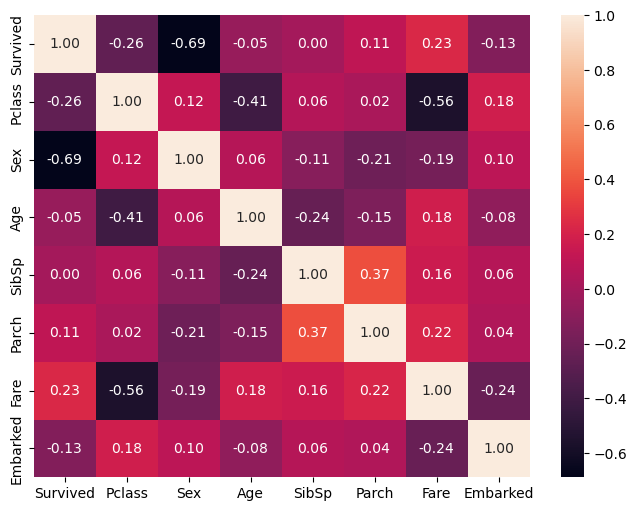

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [29]:
df.drop(columns=["Name","SibSp","Ticket","Age","Fare","Cabin"],inplace=True)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Parch         0
Embarked      0
train/test    0
dtype: int64

In [30]:
categorical_features = ["Pclass","Sex","Parch","Embarked"]
df = pd.get_dummies(df, columns = categorical_features, drop_first = True)
df.head()

,Survived,train/test,Pclass_2,Pclass_3,Sex_1,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_1,Embarked_2,Embarked_3
PassengerId,,,,,,,,,,,,,,,
1,0,Train,0,1,1,0,0,0,0,0,0,0,0,1,0
2,1,Train,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Train,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,Train,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,Train,0,1,1,0,0,0,0,0,0,0,0,1,0


In [31]:
df_train = df[df["train/test"] == "Train"]
df_test = df[df["train/test"] == "Test"]

In [32]:
X_train = df_train.drop(columns=["Survived","train/test"])
y_train = df_train["Survived"]

X_test = df_test.drop(columns=["Survived","train/test"])
y_test = df_test["Survived"]

print("train_x shape :", X_train.shape)
print("train_y shape :", y_train.shape)
print("test_X shape :", X_test.shape)
print("test_y shape :", y_test.shape)

train_x shape : (891, 13)
train_y shape : (891,)
test_X shape : (418, 13)
test_y shape : (418,)


In [33]:
x = df.drop(columns=["Survived","train/test"])
y = df["Survived"]

In [35]:
grid = {"C": np.arange(1,7,1),'gamma': [0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
svm0 = SVC(random_state=42)
svm_cv = GridSearchCV(svm0, grid, cv=10)
svm_cv.fit(x,y)
print("Best parameters of SVC :", svm_cv.best_params_)

Best parameters of SVC : {'C': 1, 'gamma': 0.005}


In [37]:
svm = SVC(C=svm_cv.best_params_["C"], gamma=svm_cv.best_params_["gamma"],random_state=42)
svm.fit(X_train, y_train)
print("SVC Accuracy :", svm.score(X_test, y_test))

SVC Accuracy : 1.0


In [41]:
accuracy = cross_val_score(estimator=svm, X=x, y=y, cv=30)
print(accuracy.mean())

0.8558491895701199


In [44]:
f1 = f1_score(y_test, svm.predict(X_test),average=None)
print(f1)

[1. 1.]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



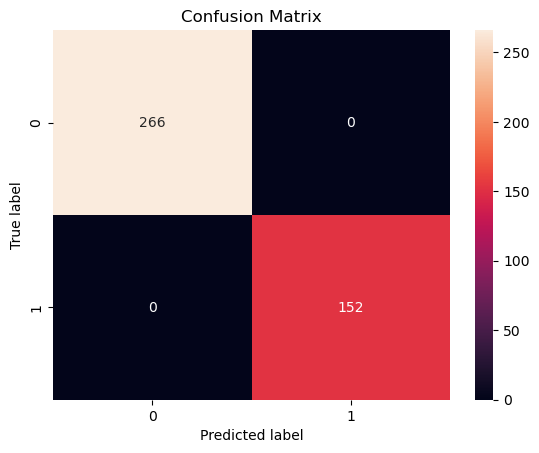

In [47]:
prediction = svm.predict(X_test)
plt.figure()
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt=".0f")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
print(classification_report(y_test, prediction))

In [54]:
output = pd.DataFrame({'PassengerId': test_df["PassengerId"], 'Survived': prediction})
output.to_csv('./Data/submission.csv', index=False)